# Generation of the plots for depth in paper

In [25]:
import pandas as pd

import matplotlib.pyplot as plt

import os

In [26]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=18)

# Difference in Depth

In [27]:
df_depths = pd.read_csv('data/results_means.csv', index_col=0)

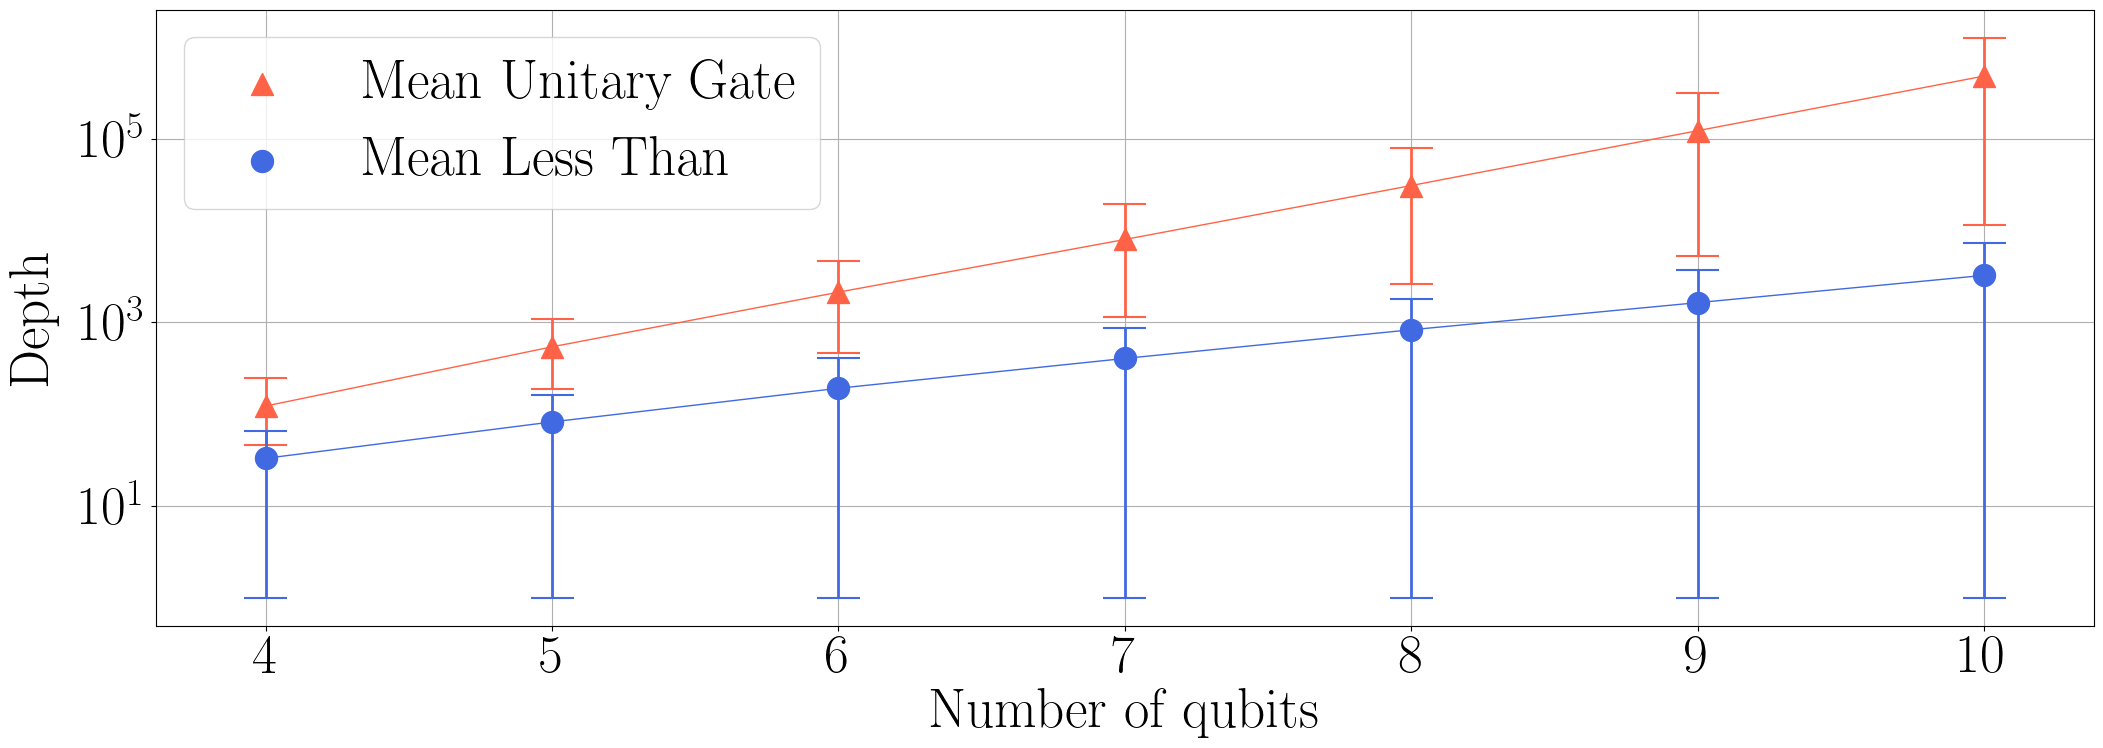

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(25,8))

x = df_depths.index.tolist()
y_UG = df_depths['UG_depth_mean'].values
y_UG_min = df_depths['UG_depth_min'].values
y_UG_max = df_depths['UG_depth_max'].values

y_LT = df_depths['LT_depth_mean'].values
y_LT_min = df_depths['LT_depth_min'].values
y_LT_max = df_depths['LT_depth_max'].values


#  mean +- std parameters
linewidth_std = 1

size_scatter = 250

error_cap = 0.15


# Unitary Gate

ax.scatter(x, y_UG, marker='^', s=size_scatter, facecolor='tomato', label='Mean Unitary Gate', zorder=4)
ax.plot(x, y_UG, c='tomato', linewidth=linewidth_std, zorder=5)

for i, v in enumerate(y_UG_min):
    ax.vlines(x=i+4, ymin=v, ymax=y_UG_max[i], linewidths=2, color='tomato')
    ax.hlines(y=v, xmin=i+4-error_cap/2, xmax=i+4+error_cap/2, color='tomato')
    ax.hlines(y=y_UG_max[i], xmin=i+4-error_cap/2, xmax=i+4+error_cap/2, color='tomato')

# Less Than

ax.scatter(x, y_LT, marker='o', s=size_scatter, facecolor='royalblue', label='Mean Less Than', zorder=4)
ax.plot(x, y_LT, c='royalblue', linewidth=linewidth_std, zorder=5)


for i, v in enumerate(y_LT_min):
    ax.vlines(x=i+4, ymin=v, ymax=y_LT_max[i], linewidths=2, color='royalblue')
    ax.hlines(y=v, xmin=i+4-error_cap/2, xmax=i+4+error_cap/2, color='royalblue')
    ax.hlines(y=y_LT_max[i], xmin=i+4-error_cap/2, xmax=i+4+error_cap/2, color='royalblue')


ax.grid(True, zorder=0)

fontsize = 40

# ax.set_title('Comparison between methods', fontsize=fontsize+2)

ax.set_xticks(df_depths.index)
ax.set_xticklabels(df_depths.index)

ax.set_xlabel('Number of qubits',fontsize=fontsize)
ax.set_ylabel('Depth',fontsize=fontsize)

ax.legend(fontsize=fontsize, loc='upper left')

ax.set_yscale('log')

ax.tick_params(labelsize=fontsize-1)

ax.yaxis.set_label_coords(-0.05, 0.5)

folder = 'images'
name_image = 'comparison_depth_correction.png'
dpi_ = 400

plt.savefig(os.path.join(folder, name_image), dpi=dpi_, bbox_inches='tight')

# Depth using 7 qubits

In [14]:
nqubits = 7

In [23]:
df = pd.read_csv('data/results_%d_qubits.csv'%nqubits, index_col=0)
y_qiskit = df['UG_depth'].values
y_lt = df['LT_depth'].values
x = df.index.tolist()

# Ploteo definitivo

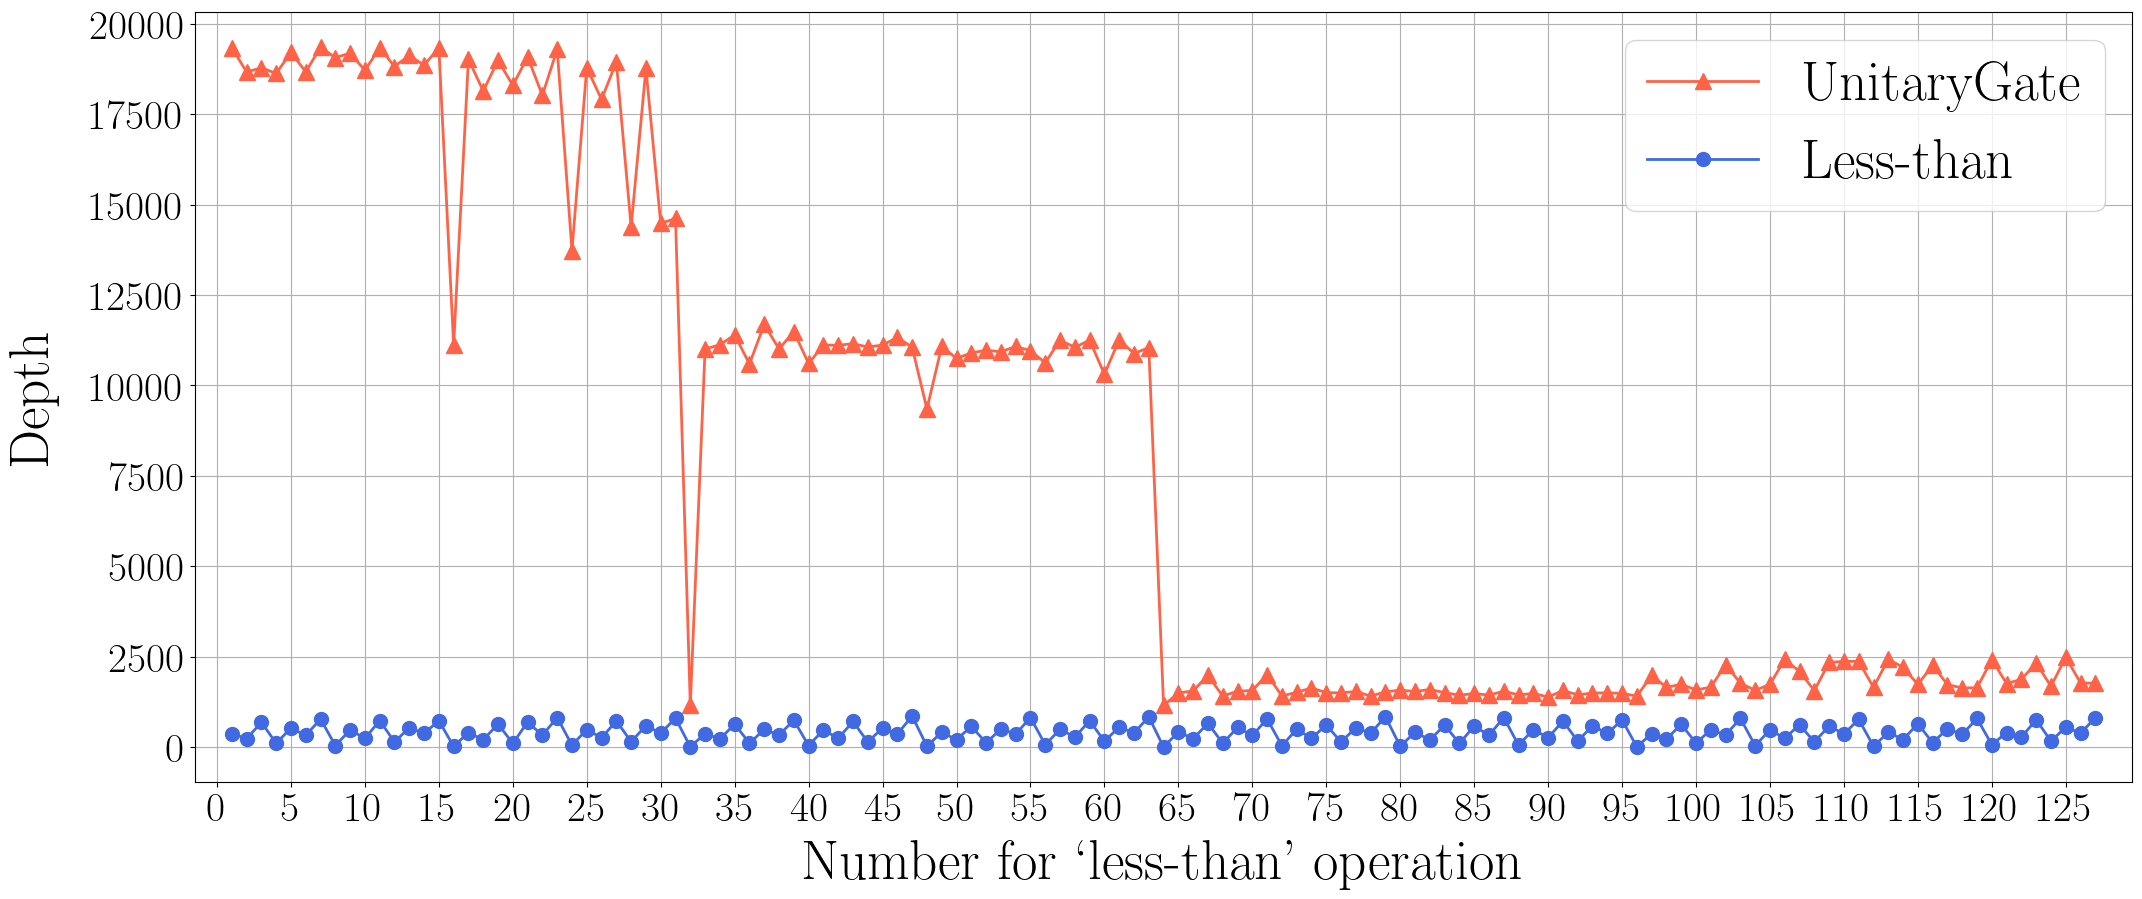

In [24]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=20)

fig, ax = plt.subplots(1, 1, figsize=(25,10))

label_unitary = 'UnitaryGate'
label_less_than = 'Less-than'


markersize = -9/4*(nqubits-4) + 15
markersize = 11
linewidth = 2

ax.plot(x, y_qiskit, 'tomato', zorder=3, linewidth=linewidth, marker='^', markersize=markersize, label=label_unitary)

ax.plot(x, y_lt, 'royalblue', zorder=3, linewidth=linewidth, marker='o', markersize=markersize-1, label=label_less_than)

fontsize=40

ax.set_ylabel('Depth', fontsize=fontsize)
ax.set_xlabel('Number for `less-than\' operation', fontsize=fontsize)

ax.xaxis.set_label_coords(0.5, -0.075)
ax.yaxis.set_label_coords(-0.07, 0.5)

ax.grid(axis='both', zorder=0)

fontsize_ticks = 30
ax.tick_params(labelsize=fontsize_ticks)
ax.set_xticks(list(range(0, 2**nqubits, 5)))

ax.set_xlim([0.5-2**nqubits/64, 2**nqubits-0.5+2**nqubits/64])

ax.legend(fontsize=fontsize)


folder = 'images'
name_image = 'plot_depth_7_nqubits.png'
dpi_ = 400

plt.savefig(os.path.join(folder, name_image), dpi=dpi_, bbox_inches='tight')